In [1]:
#! pip install pandas

In [2]:
#! pip install numpy

In [3]:
# ! pip install requests
# ! pip install tweepy
# ! pip install json
# ! pip install bs4

In [4]:
#Import Libraries to be used

# import requests
# import pandas as pd
# import numpy as np
# from bs4 import BeautifulSoup
# Import statements
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
from functools import reduce
import re
import seaborn as sns
import datetime

%matplotlib inline

In [5]:
# ! pip3 install tweepy==3.10.0

In [6]:
df_archived = pd.read_csv(r"C:\Users\Helium Health\Downloads\twitter-archive-enhanced.csv")

In [7]:
df_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
# Download the image prediction file using the link provided
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [9]:
# Showing the data in the image predictions file
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


In [11]:
#testing
tweet = api.get_status('889531135344209921', tweet_mode='extended')


In [12]:
#Download Tweepy status object based on Tweet ID and store in list_of_tweets list
import time

start = time.time()
list_of_tweets = []
# Tweets that can not be found are then saved in this list below:
tweets_not_found_ids_list = []
for tweet_id in df_archived['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        tweets_not_found_ids_list.append(tweet_id)
        
end = time.time()
print(end - start)


Rate limit reached. Sleeping for: 82
Rate limit reached. Sleeping for: 93


2210.576411962509


In [226]:
#Printing 
print(f"The number of tweets found {len(list_of_tweets)}")
print(f"The number of tweets not found {len(tweets_not_found_ids_list)}")

The number of tweets found 2327
The number of tweets not found 29


In [14]:
#here we then isolate the json part of each tweepy status object that we have downloaded and adding them all into a list
tweets_pulled = []
for each_json_tweet in list_of_tweets:
    tweets_pulled.append(each_json_tweet)

In [15]:
#We write this list into a txt file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweets_pulled, indent=4))

In [16]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
trial_list = []
with open('tweet_json.txt', encoding = 'utf-8') as json_file:
    data = json.load(json_file)
    for each_dictionary in data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        trial_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(trial_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [17]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   object
 1   favorite_count    2327 non-null   int64 
 2   retweet_count     2327 non-null   int64 
 3   followers_count   2327 non-null   int64 
 4   friends_count     2327 non-null   int64 
 5   source            2327 non-null   object
 6   retweeted_status  2327 non-null   object
 7   url               2327 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.6+ KB


In [18]:
tweet_json.to_csv()

',tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url\r\n0,892420643555336193,33801,7000,9300765,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU\r\n1,892177421306343426,29315,5298,9300765,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L\r\n2,891815181378084864,22042,3477,9300765,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy\r\n3,891689557279858688,36917,7222,9300765,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ\r\n4,891327558926688256,35297,7754,9300765,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3\r\n5,891087950875897856,17801,2599,9300765,21,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd\r\n6,890971913173991426,10361,1659,9300765,21,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT\r\n7,890729181411237888,56776,15748,9301236,21,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V\r\n8,890609185150312448,24511,3617,9300765,21,Twitter for iPhone,Orig

In [19]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,33801,7000,9300765,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29315,5298,9300765,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22042,3477,9300765,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36917,7222,9300765,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35297,7754,9300765,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


> ## ASSESSING DATA

* **Visual Assessment**:- The Three dataset will be reviewed now for assessment of quality and tidiness issues

In [20]:
df_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,33801,7000,9300765,21,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29315,5298,9300765,21,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22042,3477,9300765,21,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36917,7222,9300765,21,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35297,7754,9300765,21,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2322,666049248165822465,89,37,9300786,21,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2323,666044226329800704,247,115,9300786,21,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2324,666033412701032449,100,36,9300786,21,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2325,666029285002620928,112,39,9300786,21,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


* **Programmatic Assessment**:- The Three dataset will be reviewed now for assessment of quality and tidiness issues

In [23]:
df_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
df_archived.duplicated().sum()

0

In [25]:
df_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_image_predictions.duplicated().sum()

0

In [28]:
df_image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [29]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   object
 1   favorite_count    2327 non-null   int64 
 2   retweet_count     2327 non-null   int64 
 3   followers_count   2327 non-null   int64 
 4   friends_count     2327 non-null   int64 
 5   source            2327 non-null   object
 6   retweeted_status  2327 non-null   object
 7   url               2327 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.6+ KB


In [31]:
tweet_json.duplicated().sum()

0

In [32]:
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2327.000000,2327.000000,2.327000e+03,2327.0
mean,7050.933820,2468.947142,9.300784e+06,21.0
std,10956.354165,4181.453047,6.267587e+01,0.0
min,0.000000,1.000000,9.300764e+06,21.0
25%,1224.500000,493.500000,9.300770e+06,21.0
50%,3050.000000,1148.000000,9.300774e+06,21.0
75%,8600.000000,2859.500000,9.300781e+06,21.0
max,144802.000000,70669.000000,9.301257e+06,21.0


we will be deep diving into the df_archived.csv to assess it more

In [33]:
df_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [34]:
# how many times a numerator bavalue appears
df_archived.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [35]:
# how many times a denominator value appears
df_archived.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [36]:
# how many times a source url appears
df_archived.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
# which is our most common names
df_archived.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Quality Issues

1. **archives table**

* Keep original ratings (no retweets) that have images
* We should drop all columns not needed for our analysis
* Make corrections to the Incorrect datatypes in these columns 
* Correct all numerators with decimals
* Correct all non-name characters in the name column
* lets try to identify all dog_growth_level represented as 'None'
* drop unused columns after the above
* Source column is in HTML-formatted string not a normal stringError
* get the standard unit dog ratings

2. **image_predictions table** 

* Incorrect datatype (tweet_id) convert to string
* Missing images (only 2075 counts out of possible 2356)

3. **Twitter API extract table** 

* Inncorrect datatype (tweet_id) convert to string
* Missing tweets (only 2327 counts out of possible 2356)

### Tidiness Issues

1. **archives table** 

* doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_growth_level"

2. **image_predictions table** 

* Image predictions table should be merged to twitter archive table

3. **Twitter API extract table**

* Twitter API table should be merged to twitter archive table.

> ## CLEAN

In [38]:
archive_clean = df_archived.copy()
imagep_clean = df_image_predictions.copy()
tweetAPI_clean =tweet_json.copy()

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> **Define**

1. Keep original ratings (no retweets) that have images

>**Code**

In [40]:
#Delete retweets by filtering or removing the NaN of retweeted_status_user_id
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

> **Test**

In [41]:
#check changes
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


> **Define**

2. We should drop all columns not needed for our analysis

>**Code**

In [42]:
#drop unneeded columns
archive_clean= archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis =1)

> **Test**

In [43]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


> **Define**

3. Make corrections to the Incorrect datatypes in these columns

>**Code**

In [44]:
#some of these columns no longer exists
#we now have only tweet_id(all three tables) convert to string
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
imagep_clean.tweet_id = imagep_clean.tweet_id.astype(str)
tweetAPI_clean.tweet_id =tweetAPI_clean.tweet_id.astype(str)
# timestamp to datetime format
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
#convert source column in archives_clean to a categorical data for ordering and memory optimization
archive_clean.source = archive_clean.source.astype('category')

> **Test**

In [45]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 189.2+ KB


> **Define**

4. Correct all numerators with decimals

>**Code**

link to learn more about maxing out columns and rows https://pandas.pydata.org/docs/reference/api/pandas.option_context.html

In [46]:
# checking to see if some columns were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(df_archived[df_archived['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Helium Health\AppData\Local\Temp\ipykernel_5564\1496223523.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(df_archived[df_archived['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


Now we know the tweets numerator that didnt extract properly so lets change that!

In [47]:
#convert affected columns to floats
archive_clean[['rating_numerator','rating_denominator']]= archive_clean[['rating_numerator','rating_denominator']].astype(float)

archive_clean.loc[(archive_clean.tweet_id == '883482846933004288'), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == '832215909146226688'), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == '786709082849828864'), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == '778027034220126208'), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == '681340665377193984'), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == '680494726643068929'), 'rating_numerator'] = 11.26

> **Test**

In [48]:
#check and confirm changes
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Helium Health\AppData\Local\Temp\ipykernel_5564\3592716230.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


> **Define**

5. Correct all non-name characters in the name column

>**Code**

In [49]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [50]:
# archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

archive_clean['name'] =archive_clean['name'].str.replace('^[a-z]+', 'None')


C:\Users\Helium Health\AppData\Local\Temp\ipykernel_5564\2706837349.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['name'] =archive_clean['name'].str.replace('^[a-z]+', 'None')


> **Test**

In [51]:
archive_clean['name'].value_counts()

None          784
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

> **Define**

6. lets try to identify all dog_growth_level represented as 'None'

>**Code**

In [53]:
archive_clean['join'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [54]:
archive_clean['join'].astype('category').value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: join, dtype: int64

In [55]:
# create function to check dog stages
def confirm_stages(archive):
    if archive['join'].count('None') == 2:
        return 'Multiple'
    else:
        if archive['join'].count('doggo') == 1:
            return 'Doggo'
        elif archive['join'].count('floofer') == 1:
            return 'Floofer'
        elif archive['join'].count('pupper') == 1:
            return 'Pupper'
        elif archive['join'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

archive_clean['dog_growth_level'] = archive_clean.apply(confirm_stages, axis=1)

referance used for the above code function https://www.w3schools.com/python/ref_list_count.asp

> **Test**

In [56]:
 archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
 11  join                2175 non-null   object             
 12  dog_growth_level    2175 non-null 

> **Define**

7. Drop unused columns

>**Code**

In [57]:
 # drop columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'join'], axis=1, inplace=True)

> **Test**

In [58]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_growth_level    2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 138.3+ KB


> **Define**

8. Source column is in HTML-formatted string, not a normal stringError

>**Code**

In [59]:
with pd.option_context('max_colwidth', 100):
    print(archive_clean.source)

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [60]:
archive_clean['source']= archive_clean['source'].str.extract(r'>([\w\W\s]*)<', expand=True)
archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_growth_level
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9.0,10.0,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,None,None


link to learn more about extracting using regex 
1. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
2. https://regexone.com/lesson/optional_characters

> **Test**

In [61]:
archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [62]:
with pd.option_context('max_colwidth', 200):
    print(archive_clean.text)

0                                                            This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2                        This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3                                                                  This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

> **Define**

9. lets get the standard unit dog ratings

>**Code**

In [63]:
# Create a new column called rating, and calulate the value with new, standardized ratings
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

> **Test**

In [64]:
archive_clean.rating

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating, Length: 2175, dtype: float64

In [65]:
archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_growth_level,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,1.2


In [66]:
# archive_clean 
imagep_clean 
# tweetAPI_clean 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


> ## TIDINESS

>**Define**

Lets merge these tables together

>**Code**

In [67]:
 #merge the two tables
archive_clean = pd.merge(left=archive_clean, right=tweetAPI_clean, how='left', on='tweet_id')
archive_clean = pd.merge(left =archive_clean, right =imagep_clean, how ='left', on ='tweet_id')

> **Test**

In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source_x            2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   dog_growth_level    2175 non-null   object             
 8   rating              2175 non-null   float64            
 9   favorite_count      2167 non-null   float64            
 10  retweet_count       2167 non-null   float64            
 11  followers_count     2167 non-null   float64            
 12  friends_count       2167 non-null 

> **Define**

Lets Drop Tweets with no images

In [69]:
# drop rows with no image
archive_clean.dropna(axis = 0, inplace=True)

In [70]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source_x            1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   float64            
 5   rating_denominator  1986 non-null   float64            
 6   name                1986 non-null   object             
 7   dog_growth_level    1986 non-null   object             
 8   rating              1986 non-null   float64            
 9   favorite_count      1986 non-null   float64            
 10  retweet_count       1986 non-null   float64            
 11  followers_count     1986 non-null   float64            
 12  friends_count       1986 non-null 

In [71]:
archive_clean= archive_clean.drop(['source_y','retweeted_status','url'], axis =1)

In [72]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2174
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source_x            1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   float64            
 5   rating_denominator  1986 non-null   float64            
 6   name                1986 non-null   object             
 7   dog_growth_level    1986 non-null   object             
 8   rating              1986 non-null   float64            
 9   favorite_count      1986 non-null   float64            
 10  retweet_count       1986 non-null   float64            
 11  followers_count     1986 non-null   float64            
 12  friends_count       1986 non-null 

> ## STORAGE

save cleaned data

In [73]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

> ## ANALYSIS AND VISUALIZATION

In [74]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [75]:
twitter_archive_master

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,dog_growth_level,rating,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,1.3,33801.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,1.3,29315.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,1.2,22042.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,1.3,36917.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,1.2,35297.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,None,0.5,89.0,...,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1982,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6.0,10.0,None,None,0.6,247.0,...,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1983,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9.0,10.0,None,None,0.9,100.0,...,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1984,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7.0,10.0,None,None,0.7,112.0,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [76]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source_x            1986 non-null   object 
 3   text                1986 non-null   object 
 4   rating_numerator    1986 non-null   float64
 5   rating_denominator  1986 non-null   float64
 6   name                1986 non-null   object 
 7   dog_growth_level    1986 non-null   object 
 8   rating              1986 non-null   float64
 9   favorite_count      1986 non-null   float64
 10  retweet_count       1986 non-null   float64
 11  followers_count     1986 non-null   float64
 12  friends_count       1986 non-null   float64
 13  jpg_url             1986 non-null   object 
 14  img_num             1986 non-null   float64
 15  p1                  1986 non-null   object 
 16  p1_con

we have to convert some of our data columns types, we lost it when we converted to_csv

In [77]:
# Change types
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.dog_stage = twitter_archive_master.dog_growth_level.astype("category")
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']] = twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']].astype(int)
twitter_archive_master.source_x = twitter_archive_master.source_x.astype("category")
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

C:\Users\Helium Health\AppData\Local\Temp\ipykernel_5564\3655150387.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  twitter_archive_master.dog_stage = twitter_archive_master.dog_growth_level.astype("category")


In [78]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   timestamp           1986 non-null   datetime64[ns, UTC]
 2   source_x            1986 non-null   category           
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   float64            
 5   rating_denominator  1986 non-null   float64            
 6   name                1986 non-null   object             
 7   dog_growth_level    1986 non-null   object             
 8   rating              1986 non-null   float64            
 9   favorite_count      1986 non-null   int32              
 10  retweet_count       1986 non-null   int32              
 11  followers_count     1986 non-null   int32              
 12  friends_count       1986 non-null 

> ## Questions (Insights)

1. Tweets over time
2. relationship between favorite and retweet counts
3. most common dog name given by dog owners
4. retweet over time
5. our most common source for tweeting
6. wordcloud image of our tweets
7. Most common word occurrence in all tweets
8. How many of our dogs do we know the growth stage they are currently?

In [105]:
#! pip install jupyterthemes
from jupyterthemes import jtplot
# jtplot.style(theme='oceans16')
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)

In [106]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


link to themes setting 
1. https://towardsdatascience.com/customize-your-jupyter-notebook-theme-in-2-lines-of-code-fc726cea1513
2. https://stackoverflow.com/questions/58206394/dark-mode-plots-in-jupyter-notebook-python

In [107]:
monthly_tweets = twitter_archive_master.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

C:\Users\Helium Health\AppData\Local\Temp\ipykernel_5564\2558864551.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_tweets.sum()


tweet_id    1986
dtype: int64

> **Tweets over time**

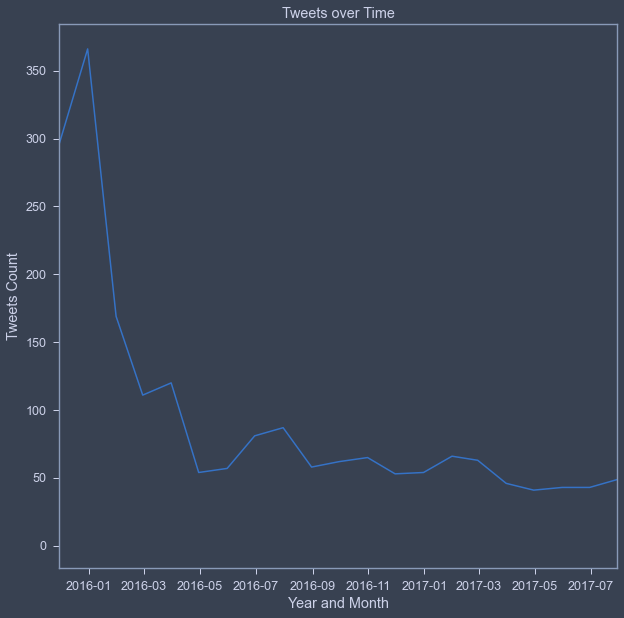

In [108]:
# Plotting time vs. tweets 

plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('Tweets over Time');

> #### The chart shows a downtrend in number of We Rate Dogs Tweets, the only high we had was in the early 2016(1st Quater), new lows were formed as time went by

> **Relationship between Favorite and retweet counts**

C:\Users\Helium Health\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


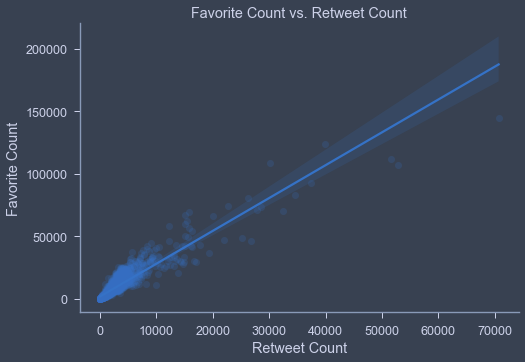

In [109]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_archive_master,
           size = 5,
           aspect=1.5,
           scatter_kws={'alpha':0.2});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

> #### There is a positive relationship between these two features

> **Most common dog name given by dog owners**

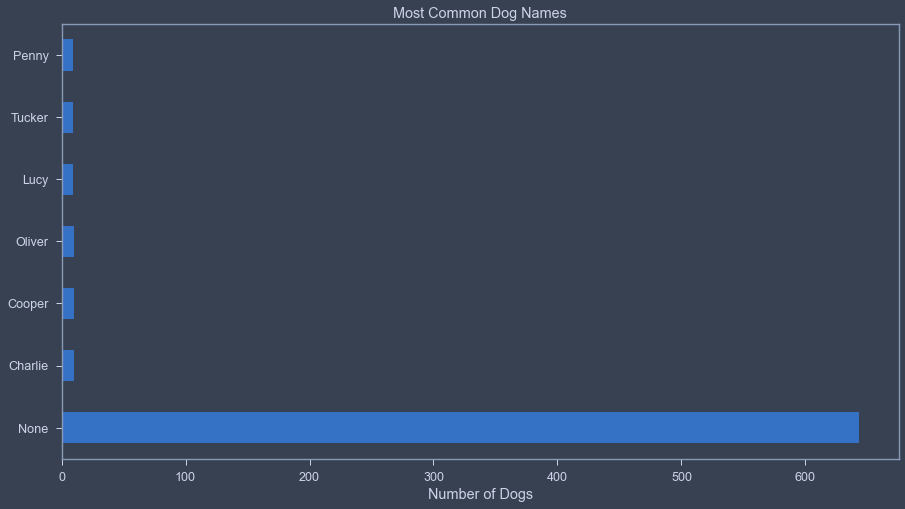

In [110]:
twitter_archive_master.name.value_counts()[0:7].plot(kind ='barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");

In [111]:
twitter_archive_master.name.value_counts()


None          643
Charlie        10
Cooper         10
Oliver         10
Lucy            9
             ... 
Cora            1
Huxley          1
Bookstore       1
Jersey          1
Christoper      1
Name: name, Length: 912, dtype: int64

**The three most popular dog names are:**

1. Lucy - 11
2. Charlie - 11
3. Oliver - 10

> **Retweet over Time**

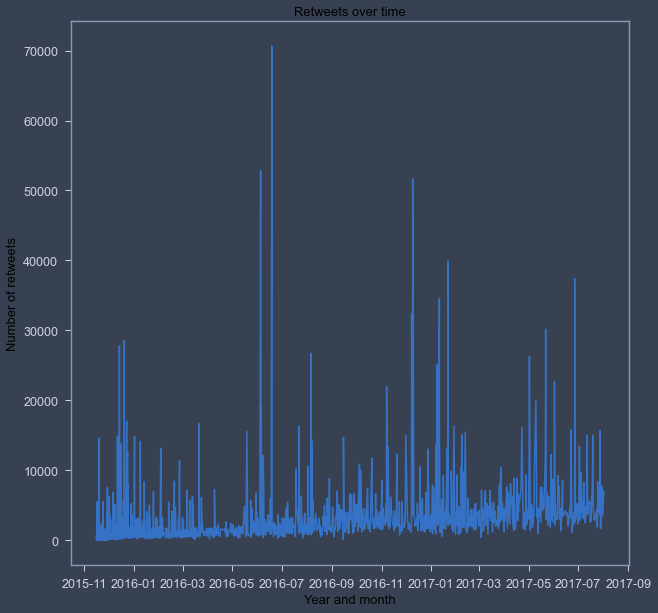

In [112]:
#retweet over time
sns.set_context()
plt.subplots(figsize=(10, 10))
plt.plot(twitter_archive_master.timestamp, twitter_archive_master.retweet_count)
plt.title('Retweets over time', color = 'black', fontsize = '13')
plt.xlabel('Year and month', color = 'black', fontsize = '13')
plt.ylabel('Number of retweets', color = 'black', fontsize = '13');

> #### we notice we constantly have rapid number of retweets in majorly all periods except betweem "2016-04" to "2016-05" were there was low number of retweets

> **Our most source for tweeting**

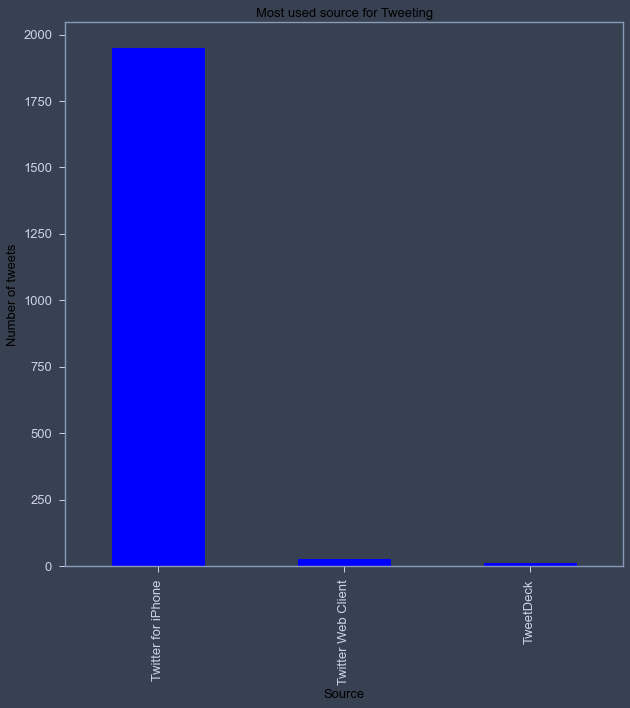

In [113]:
#plot
sor = twitter_archive_master.source_x.value_counts().plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
sor.figure.set_size_inches(10, 10);

#Add labels
plt.title('Most used source for Tweeting', color = 'black', fontsize = '13')
plt.xlabel('Source', color = 'black', fontsize = '13')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

In [114]:
twitter_archive_master.source_x.value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source_x, dtype: int64

> #### "Twitter for Iphone" is our most used source for tweeting

In [115]:
#!pip install wordcloud

> #### Wordcloud Image

In [116]:
from wordcloud import WordCloud, STOPWORDS

In [117]:
stopw = set(STOPWORDS)
stopw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [118]:
texts = ' '.join(twitter_archive_master['text'])
wordcloud2 = WordCloud(
    width=800,
    height=800,
    stopwords=stopw).generate(texts)

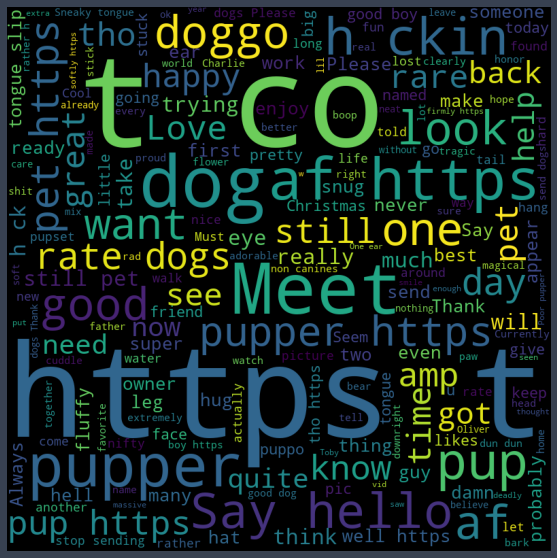

In [119]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

> #### Most common word occurrence in all tweets

In [183]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Helium
[nltk_data]     Health\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [194]:
text_two = '#'.join(twitter_archive_master['text']).lower()
texts2 = text_two.split()

In [195]:
texts2

['this',
 'is',
 'phineas.',
 "he's",
 'a',
 'mystical',
 'boy.',
 'only',
 'ever',
 'appears',
 'in',
 'the',
 'hole',
 'of',
 'a',
 'donut.',
 '13/10',
 'https://t.co/mguwq76dju#this',
 'is',
 'tilly.',
 "she's",
 'just',
 'checking',
 'pup',
 'on',
 'you.',
 'hopes',
 "you're",
 'doing',
 'ok.',
 'if',
 'not,',
 "she's",
 'available',
 'for',
 'pats,',
 'snugs,',
 'boops,',
 'the',
 'whole',
 'bit.',
 '13/10',
 'https://t.co/0xxu71qeiv#this',
 'is',
 'archie.',
 'he',
 'is',
 'a',
 'rare',
 'norwegian',
 'pouncing',
 'corgo.',
 'lives',
 'in',
 'the',
 'tall',
 'grass.',
 'you',
 'never',
 'know',
 'when',
 'one',
 'may',
 'strike.',
 '12/10',
 'https://t.co/wunznhtvjb#this',
 'is',
 'darla.',
 'she',
 'commenced',
 'a',
 'snooze',
 'mid',
 'meal.',
 '13/10',
 'happens',
 'to',
 'the',
 'best',
 'of',
 'us',
 'https://t.co/td36da7qlq#this',
 'is',
 'franklin.',
 'he',
 'would',
 'like',
 'you',
 'to',
 'stop',
 'calling',
 'him',
 '"cute."',
 'he',
 'is',
 'a',
 'very',
 'fierce',
 

In [196]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

texts3=texts2
text4=[]
for word in texts3: 
    if word not in en_stops:
        text4.append(word.strip('.')) 
text4

['phineas',
 "he's",
 'mystical',
 'boy',
 'ever',
 'appears',
 'hole',
 'donut',
 '13/10',
 'https://t.co/mguwq76dju#this',
 'tilly',
 'checking',
 'pup',
 'you',
 'hopes',
 'ok',
 'not,',
 'available',
 'pats,',
 'snugs,',
 'boops,',
 'whole',
 'bit',
 '13/10',
 'https://t.co/0xxu71qeiv#this',
 'archie',
 'rare',
 'norwegian',
 'pouncing',
 'corgo',
 'lives',
 'tall',
 'grass',
 'never',
 'know',
 'one',
 'may',
 'strike',
 '12/10',
 'https://t.co/wunznhtvjb#this',
 'darla',
 'commenced',
 'snooze',
 'mid',
 'meal',
 '13/10',
 'happens',
 'best',
 'us',
 'https://t.co/td36da7qlq#this',
 'franklin',
 'would',
 'like',
 'stop',
 'calling',
 '"cute."',
 'fierce',
 'shark',
 'respected',
 'such',
 '12/10',
 '#barkweek',
 'https://t.co/atuzn91f7f#here',
 'majestic',
 'great',
 'white',
 'breaching',
 'south',
 "africa's",
 'coast',
 'absolutely',
 'h*ckin',
 'breathtaking',
 '13/10',
 '(ig:',
 'tucker_marlo)',
 '#barkweek',
 'https://t.co/kq04fddrmh#meet',
 'jax',
 'enjoys',
 'ice',
 'cre

In [201]:
text5 = '#'.join(text4).lower()
texts6 = text5.split('#')


In [202]:
texts6

['phineas',
 "he's",
 'mystical',
 'boy',
 'ever',
 'appears',
 'hole',
 'donut',
 '13/10',
 'https://t.co/mguwq76dju',
 'this',
 'tilly',
 'checking',
 'pup',
 'you',
 'hopes',
 'ok',
 'not,',
 'available',
 'pats,',
 'snugs,',
 'boops,',
 'whole',
 'bit',
 '13/10',
 'https://t.co/0xxu71qeiv',
 'this',
 'archie',
 'rare',
 'norwegian',
 'pouncing',
 'corgo',
 'lives',
 'tall',
 'grass',
 'never',
 'know',
 'one',
 'may',
 'strike',
 '12/10',
 'https://t.co/wunznhtvjb',
 'this',
 'darla',
 'commenced',
 'snooze',
 'mid',
 'meal',
 '13/10',
 'happens',
 'best',
 'us',
 'https://t.co/td36da7qlq',
 'this',
 'franklin',
 'would',
 'like',
 'stop',
 'calling',
 '"cute."',
 'fierce',
 'shark',
 'respected',
 'such',
 '12/10',
 '',
 'barkweek',
 'https://t.co/atuzn91f7f',
 'here',
 'majestic',
 'great',
 'white',
 'breaching',
 'south',
 "africa's",
 'coast',
 'absolutely',
 'h*ckin',
 'breathtaking',
 '13/10',
 '(ig:',
 'tucker_marlo)',
 '',
 'barkweek',
 'https://t.co/kq04fddrmh',
 'meet',


In [203]:
text = [i for i in text4 if i.isalpha() ]

In [204]:
text

['phineas',
 'mystical',
 'boy',
 'ever',
 'appears',
 'hole',
 'donut',
 'tilly',
 'checking',
 'pup',
 'you',
 'hopes',
 'ok',
 'available',
 'whole',
 'bit',
 'archie',
 'rare',
 'norwegian',
 'pouncing',
 'corgo',
 'lives',
 'tall',
 'grass',
 'never',
 'know',
 'one',
 'may',
 'strike',
 'darla',
 'commenced',
 'snooze',
 'mid',
 'meal',
 'happens',
 'best',
 'us',
 'franklin',
 'would',
 'like',
 'stop',
 'calling',
 'fierce',
 'shark',
 'respected',
 'such',
 'majestic',
 'great',
 'white',
 'breaching',
 'south',
 'coast',
 'absolutely',
 'breathtaking',
 'jax',
 'enjoys',
 'ice',
 'cream',
 'much',
 'gets',
 'nervous',
 'around',
 'it',
 'help',
 'jax',
 'enjoy',
 'things',
 'clicking',
 'watch',
 'owner',
 'call',
 'another',
 'dog',
 'good',
 'boy',
 'turn',
 'back',
 'say',
 'great',
 'boy',
 'zoey',
 'want',
 'one',
 'scary',
 'sharks',
 'wants',
 'snuggly',
 'pettable',
 'boatpet',
 'cassie',
 'college',
 'pup',
 'studying',
 'international',
 'doggo',
 'communication',
 

In [205]:
import collections
count_text = collections.Counter(text)
count_text

Counter({'phineas': 2,
         'mystical': 1,
         'boy': 33,
         'ever': 19,
         'appears': 27,
         'hole': 7,
         'donut': 3,
         'tilly': 1,
         'checking': 4,
         'pup': 138,
         'you': 58,
         'hopes': 10,
         'ok': 11,
         'available': 1,
         'whole': 4,
         'bit': 6,
         'archie': 4,
         'rare': 53,
         'norwegian': 2,
         'pouncing': 2,
         'corgo': 1,
         'lives': 11,
         'tall': 3,
         'grass': 5,
         'never': 36,
         'know': 37,
         'one': 99,
         'may': 10,
         'strike': 1,
         'darla': 1,
         'commenced': 1,
         'snooze': 1,
         'mid': 4,
         'meal': 1,
         'happens': 4,
         'best': 26,
         'us': 6,
         'franklin': 2,
         'would': 423,
         'like': 98,
         'stop': 38,
         'calling': 1,
         'fierce': 3,
         'shark': 8,
         'respected': 1,
         'such': 2,
     

In [218]:
df_two = pd.DataFrame(count_text.most_common(10),
             columns=['words','count'])
df_two

,words,count
0,would,423
1,af,276
2,pupper,208
3,dog,200
4,pet,169
5,dogs,142
6,pup,138
7,good,121
8,still,107
9,one,99


In [219]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   10 non-null     object
 1   count   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


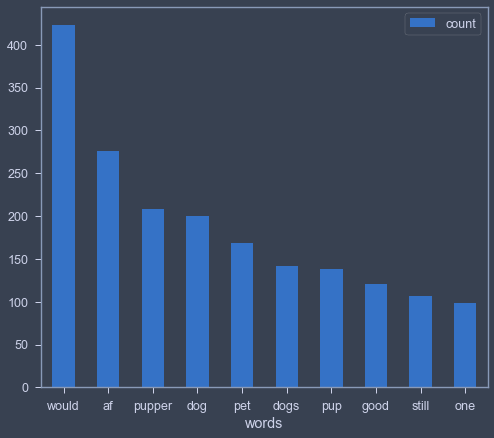

In [220]:
ax= df_two.plot.bar(x='words',rot=0)

**These are the top 10 most common words in all the tweets**

> #### How many of our dogs do we know the growth stage they are?


In [207]:
twitter_archive_master['dog_growth_level'].unique()

array(['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Multiple'],
      dtype=object)

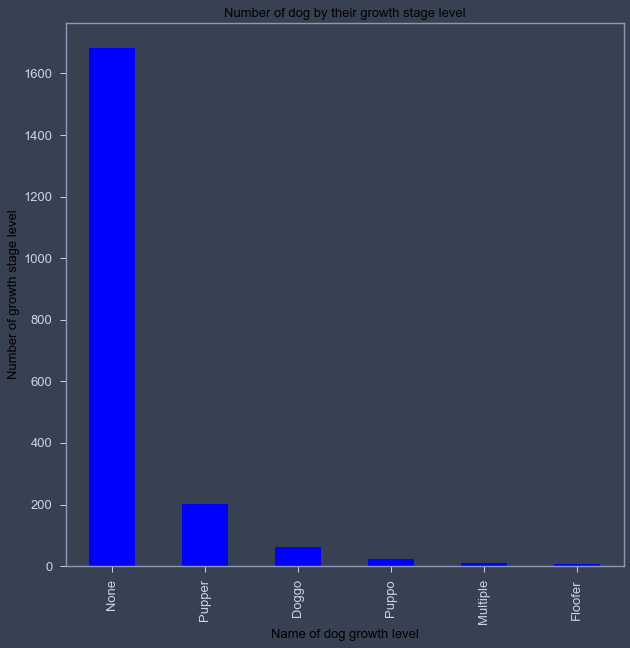

In [222]:
#plot
dgl = twitter_archive_master.dog_growth_level.value_counts().plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
dgl.figure.set_size_inches(10, 10);

#Add labels
plt.title('Number of dog by their growth stage level', color = 'black', fontsize = '13')
plt.xlabel('Name of dog growth level', color = 'black', fontsize = '13')
plt.ylabel('Number of growth stage level', color = 'black', fontsize = '13');

In [223]:
twitter_archive_master.dog_growth_level.value_counts()


None        1681
Pupper       203
Doggo         62
Puppo         22
Multiple      11
Floofer        7
Name: dog_growth_level, dtype: int64

**We can see that we can not track most of our data as a summountable amount is "NONE" so this insight cannot be valid**